<a href="https://colab.research.google.com/github/vishant750/Online_Retail_Customer_Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title - Online Retail Customer Segmentation.**

## **Problem Description**

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01-Dec-2010 and 09-Dec-2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## **Data Description**


### **Attribute Information:**
* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Customer segmentation:**
### Customer segmentation is the process by which you divide your customers up based on common characteristics so you can market to those customers more effectively.

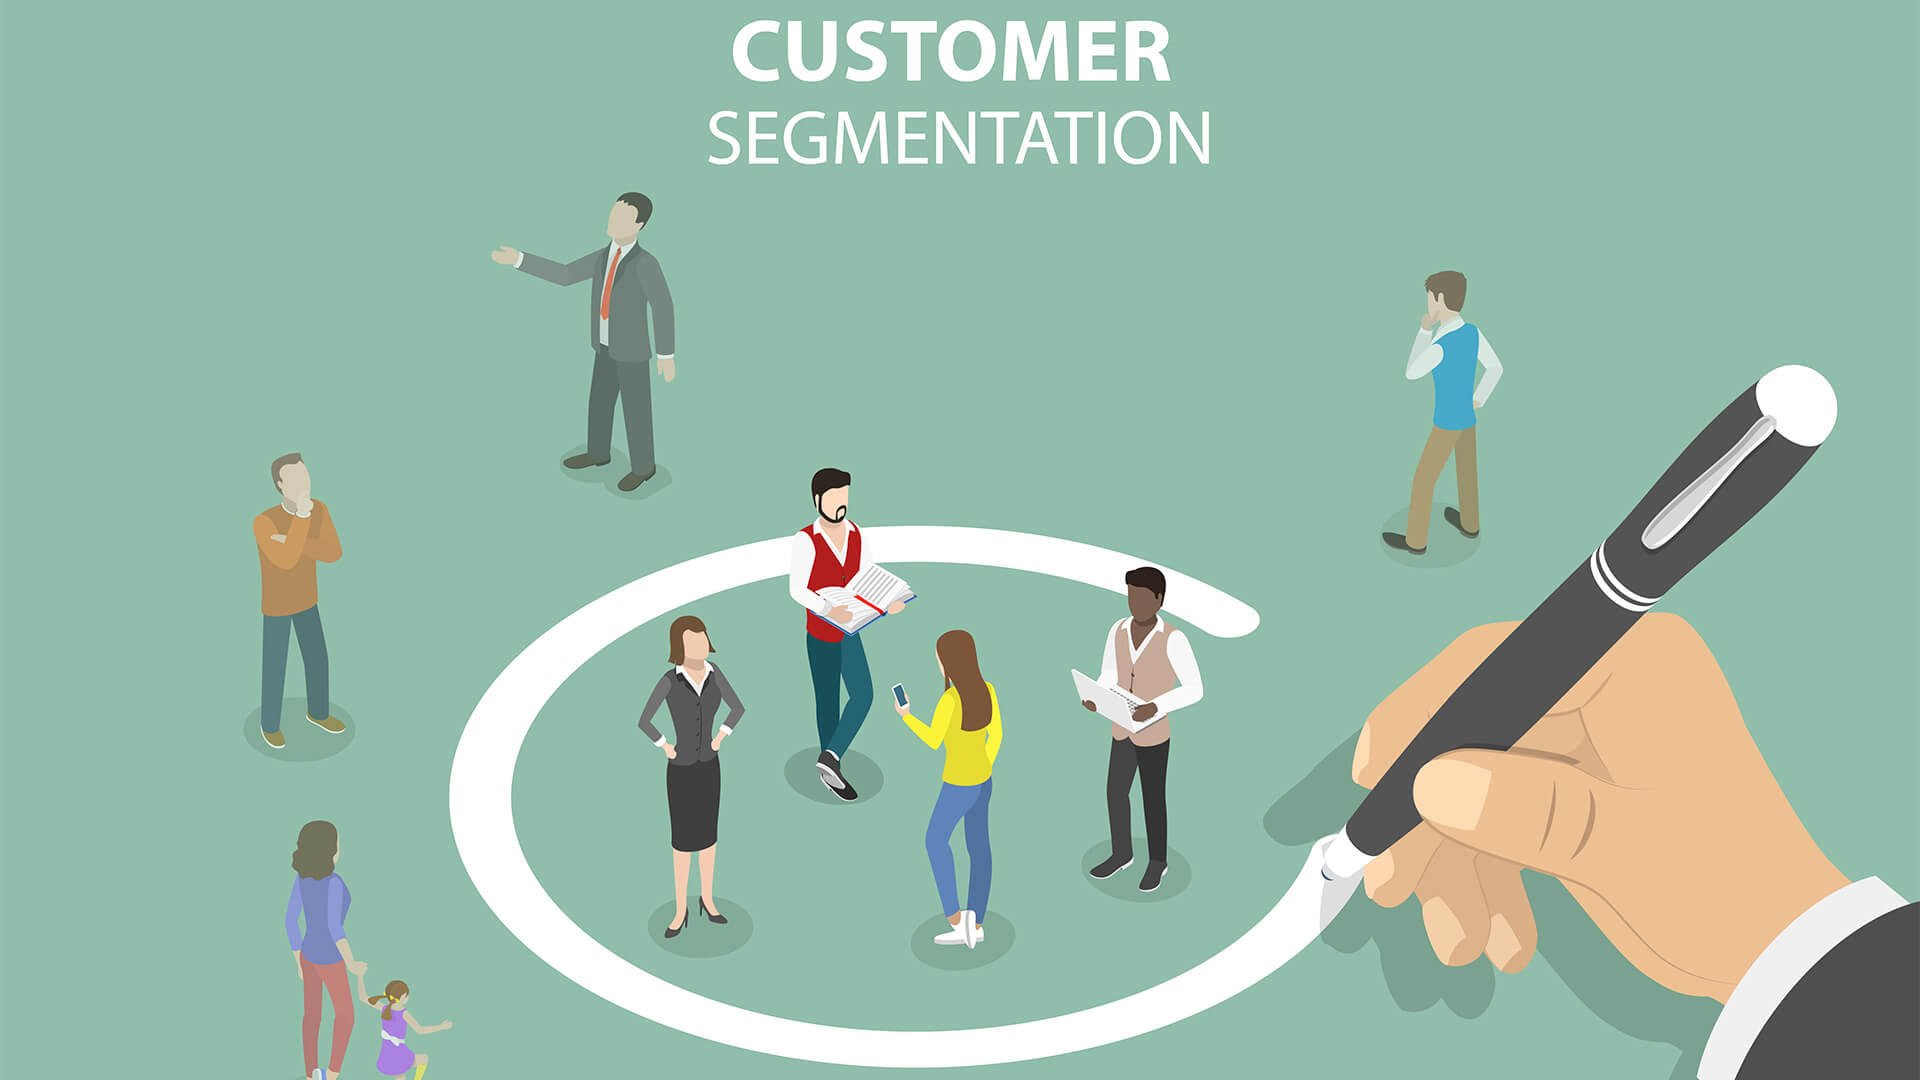

## **Different ways of segmentaion:**

### 1. Behavioral Segmentation
### 2. Geographic Segmentaion
### 3. Needs based Segmentation
### 4. Demographic Segmentation

###and many more...

## **Benefits of customer segmentation:**
### 1.Organised customer bases.
### 2.Targeted communication becomes easy.
### 3.Choosing top sales prospects becomes easy.
###and many more...

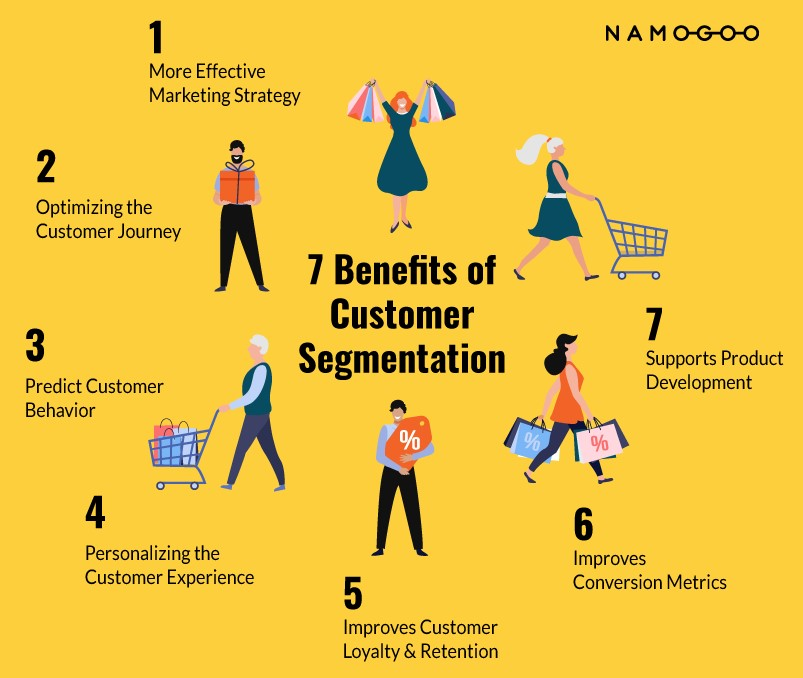

## **I'll be performing behavioral segmentation on our data in this project**
## **Project Flowchart:**
### 1.Initial preparations
### 2.Data Cleaning
### 3.Feature Engineering
### 4.EDA
### 5.Forming the segmentation criteria
### 6.Pre processing the data
### 7.Model Implementation
### 8.Conclusion

## **Initial preparations:**

In [290]:
#Loading in the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

In [149]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
customer_segmentation_df=pd.read_csv('/content/drive/MyDrive/Online Retail.xlsx - Online Retail.csv')

## **Data Cleaning:**
## Data Exploration

In [151]:
#First 5 observation of dataset
customer_segmentation_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [152]:
#Last 5 rows
customer_segmentation_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [153]:
#Shape of dataset
customer_segmentation_df.shape

(541909, 8)

In [154]:
#Concise Summary of dataset
customer_segmentation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [155]:
#Statistical description of dataset
customer_segmentation_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Handling null values:
### Missing data is defined as the values or data that is not stored (or not present) for some variable/s in the given dataset.Missing values can bias the results of the machine learning models and/or reduce the accuracy of the model.Therefore it is an essential practice to handle null values before training our model. There are two main ways of handling null values, one is to delete the observations containing null values and the other is to impute the null values with some meaning full values.

In [156]:
customer_segmentation_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### There isn't any meaningfull way to impute values in the Description and CustomerID column, therefore I will just delete them.

In [157]:
#Dropping the null values in the dataset
customer_segmentation_df.dropna(inplace=True)

In [158]:
#Checking for appended dataset
customer_segmentation_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### The null values have been deleted.

## Handling Duplicated Values

### When two features have the same set of values they are known as duplicate values.Duplicate values can cause detrimental effect on our accuracy. Duplicate values can ruin the split between train,test and validation set, which ultimately leads to a biased performance estimates that disappoint the model in production.The best way of dealing with duplicate values is to delete them.

In [159]:
#Checking if our dataset has duplicated values
customer_segmentation_df.duplicated().sum()

5225

In [160]:
#Deleting the duplicated values
customer_segmentation_df.drop_duplicates(inplace=True)

In [161]:
#Checking if all the duplicated values have been deleted
customer_segmentation_df.duplicated().sum()

0

### As we can see that all the duplicate values have been removed.

## **Removing Outliers**
### Outliers are those data points that are significantly different from the rest of the data points in the dataset. These can cause the data to skew and affect the accuracy of the ML model.

In [162]:
#Checking the features of the dataset
customer_segmentation_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### We can see that features Quatity and UnitPrice can have outliers


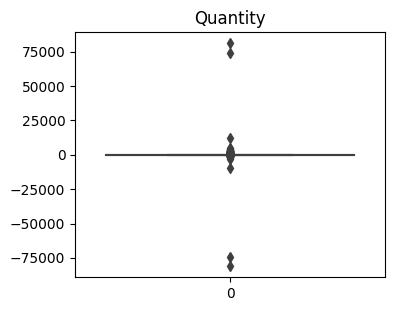

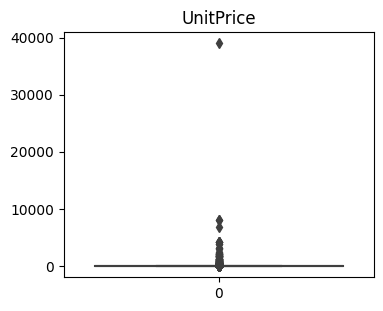

In [163]:
#Defining a list for potential outliers features
pot_out_features=['Quantity','UnitPrice']
for index,value in enumerate(pot_out_features):
  plt.figure(figsize=(4,7))
  plt.subplot(2,1,index+1)
  sns.boxplot(customer_segmentation_df[value])
  plt.title(value)

### We can see that both the features have outliers, defining a function to handle these outliers

In [164]:
#Function for handling outliers
def handling_outliers(data:pd.DataFrame,feature:str):
  #Calculating the upper and lower limit
  q1=data[feature].quantile(0.25)
  q3=data[feature].quantile(0.75)
  IQR=q3-q1
  upper_limit=q3+(1.5*IQR)
  lower_limit=q1-(1.5*IQR)
  #deleting datapoints above and below upper and lower limits
  if lower_limit<0:
    data = data[data[feature]<=upper_limit]
  else:
    data = data[(data[feature]>=lower_limit) & (data[feature]<=upper_limit)]  
  return data       
      

In [165]:
#Applying the outliers removal process on the two features
customer_segmentation_df=handling_outliers(customer_segmentation_df,'Quantity')
customer_segmentation_df=handling_outliers(customer_segmentation_df,'UnitPrice')

## **Removing cancelled orders**

### n our data, we have cancelled orders which are represented by a capital C before the Invoice number. eg: C536379 and quantity<0. I will be removing them from the dataset.

In [166]:
#Converting each value to string for comparison
customer_segmentation_df['InvoiceNo']=customer_segmentation_df['InvoiceNo'].astype(str)

In [167]:
customer_segmentation_df[customer_segmentation_df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/11 9:27,2.08,16446.0,United Kingdom
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,12/9/11 9:57,1.95,14397.0,United Kingdom
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


### We have 6,188 cancelled orders and we can move on to delete these value.

In [168]:
#Using only non-cancelled values.
customer_segmentation_df=customer_segmentation_df[customer_segmentation_df['Quantity']>0]

In [169]:
customer_segmentation_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


## **Feature Engineering**

## Extracting columns from the InvoiceDate column


In [170]:
#Converting InvoiceDate to Date type
customer_segmentation_df['InvoiceDate']=pd.to_datetime(customer_segmentation_df['InvoiceDate'])
#Using the InvoiceDate column to extract different columns
customer_segmentation_df['Hour'] = customer_segmentation_df['InvoiceDate'].dt.hour
customer_segmentation_df['DayOfM'] = customer_segmentation_df['InvoiceDate'].dt.day
customer_segmentation_df['DayOfW'] = customer_segmentation_df['InvoiceDate'].dt.strftime('%A')
customer_segmentation_df['Month'] = customer_segmentation_df['InvoiceDate'].dt.month
customer_segmentation_df['Year'] = customer_segmentation_df['InvoiceDate'].dt.year
customer_segmentation_df['InvoiceDate'] = customer_segmentation_df['InvoiceDate'].dt.date

In [171]:
customer_segmentation_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,DayOfM,DayOfW,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,8,1,Wednesday,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,8,1,Wednesday,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,8,1,Wednesday,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,8,1,Wednesday,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,8,1,Wednesday,12,2010


##**Creating the Total Amount column**
### Formula=**Total amount**=**Unit price X Quantity**

In [172]:
#Creating the total amount column
customer_segmentation_df['total_amount'] = customer_segmentation_df['Quantity'] * customer_segmentation_df['UnitPrice']

In [173]:
#Checking the dataset
customer_segmentation_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,DayOfM,DayOfW,Month,Year,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,8,1,Wednesday,12,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,8,1,Wednesday,12,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,8,1,Wednesday,12,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,8,1,Wednesday,12,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,8,1,Wednesday,12,2010,20.34


## **EDA**

In [174]:
#Creating datavisulatization function for Exploratory Data Analysis
def data_visulalization(data:pd.DataFrame,x:str,y:str,title:str,x_label:str,y_label:str,rotation:bool=True):
  plt.figure(figsize=(12,12))
  ax=sns.barplot(data=data,x=x,y=y,palette='Paired')
  #To write values on top of each bar
  for a in ax.patches:                                                        
    ax.annotate(format(a.get_height(), '.1f'),(a.get_x() + a.get_width() / 2., a.get_height()), ha = 'center', va = 'center', xytext = (0, 9),textcoords = 'offset points')
  if rotation == True:
    ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha='right')    
  plt.title(title,size=30)
  plt.xlabel(x_label,size=30)
  plt.ylabel(y_label,size=30)
  plt.show()


## **Most frequently purchased Items**

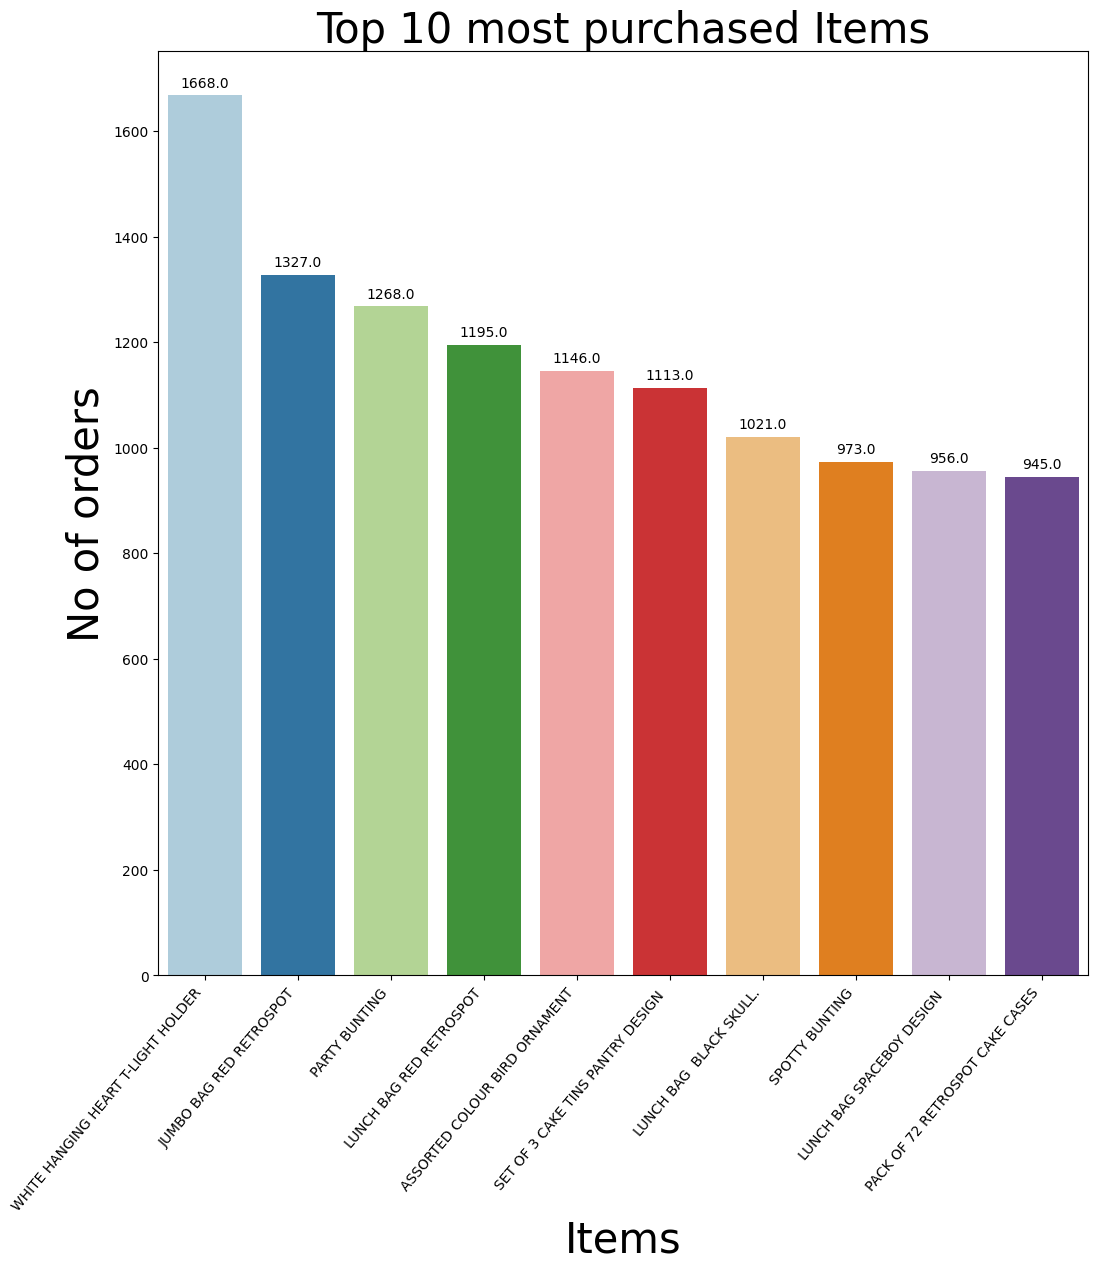

In [175]:
top_items=customer_segmentation_df['Description'].value_counts().reset_index().rename(columns={'index':'Description','Description':'Count'})[0:10]
data_visulalization(top_items,x='Description',y='Count',x_label='Items',y_label='No of orders',title='Top 10 most purchased Items')

### The product which is most frequently sold is '*WHITE HANGING HEART T-LIGHT HOLDER*' followed by '*JUMBO BAG RED RETROSPOT*'

## **Product with most quantity ordered**

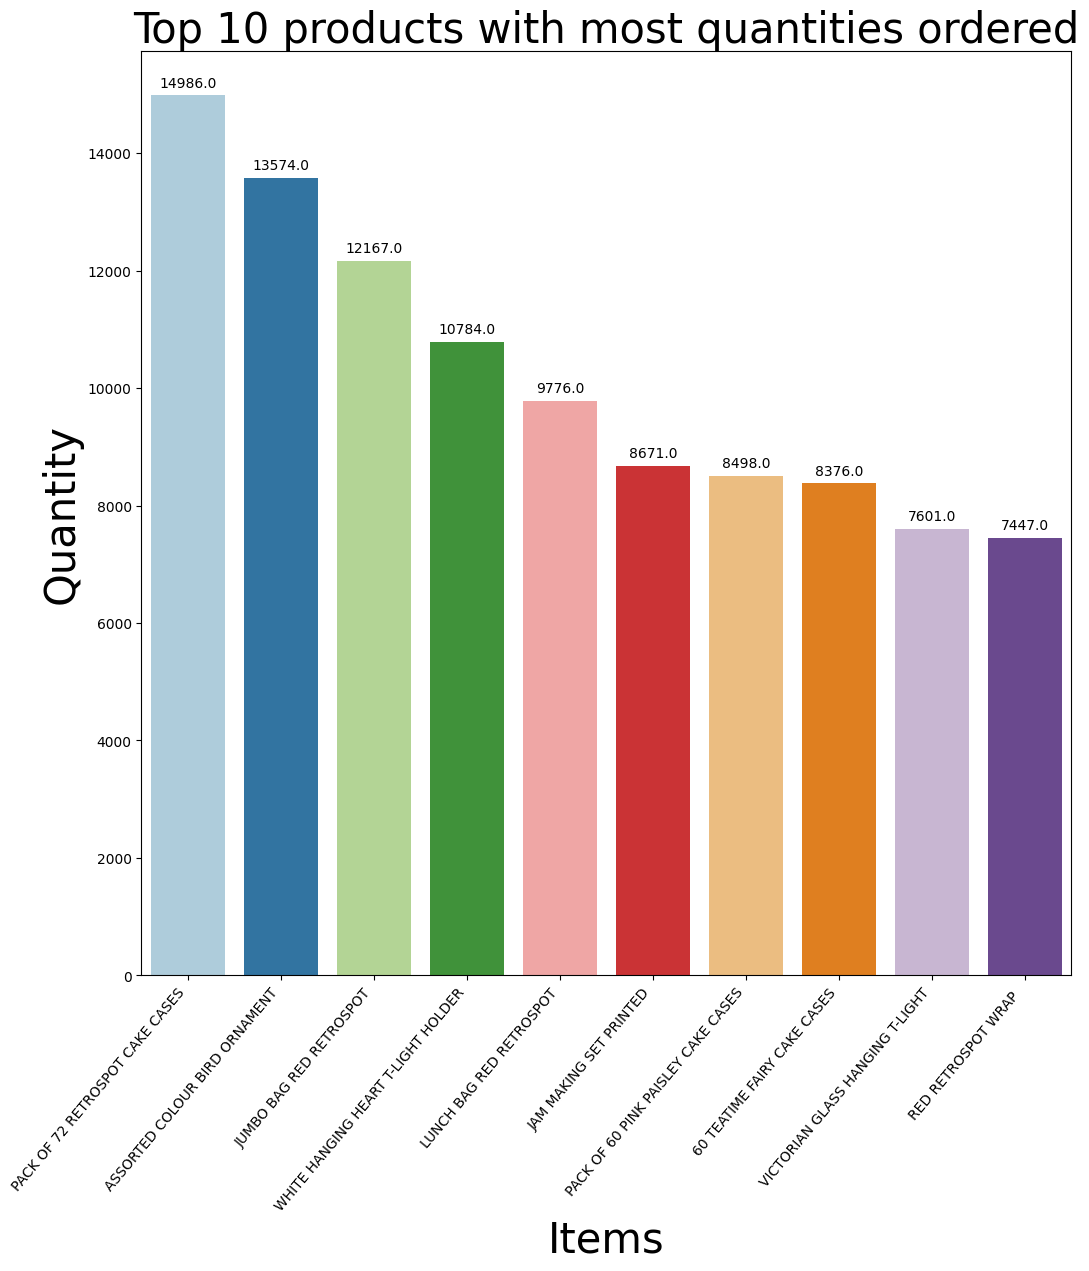

In [176]:
product_quantity=customer_segmentation_df.groupby('Description')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)[0:10]
data_visulalization(product_quantity,x='Description',y='Quantity',x_label='Items',y_label='Quantity',title='Top 10 products with most quantities ordered')


### The product '*PACK OF 72 RETROSPOT CAKE CASES*' has the most amount of quantity ordered followed by '*ASSORTED COLOUR BIRK ORNAMENT*' product.

## **Product that makes the most money**

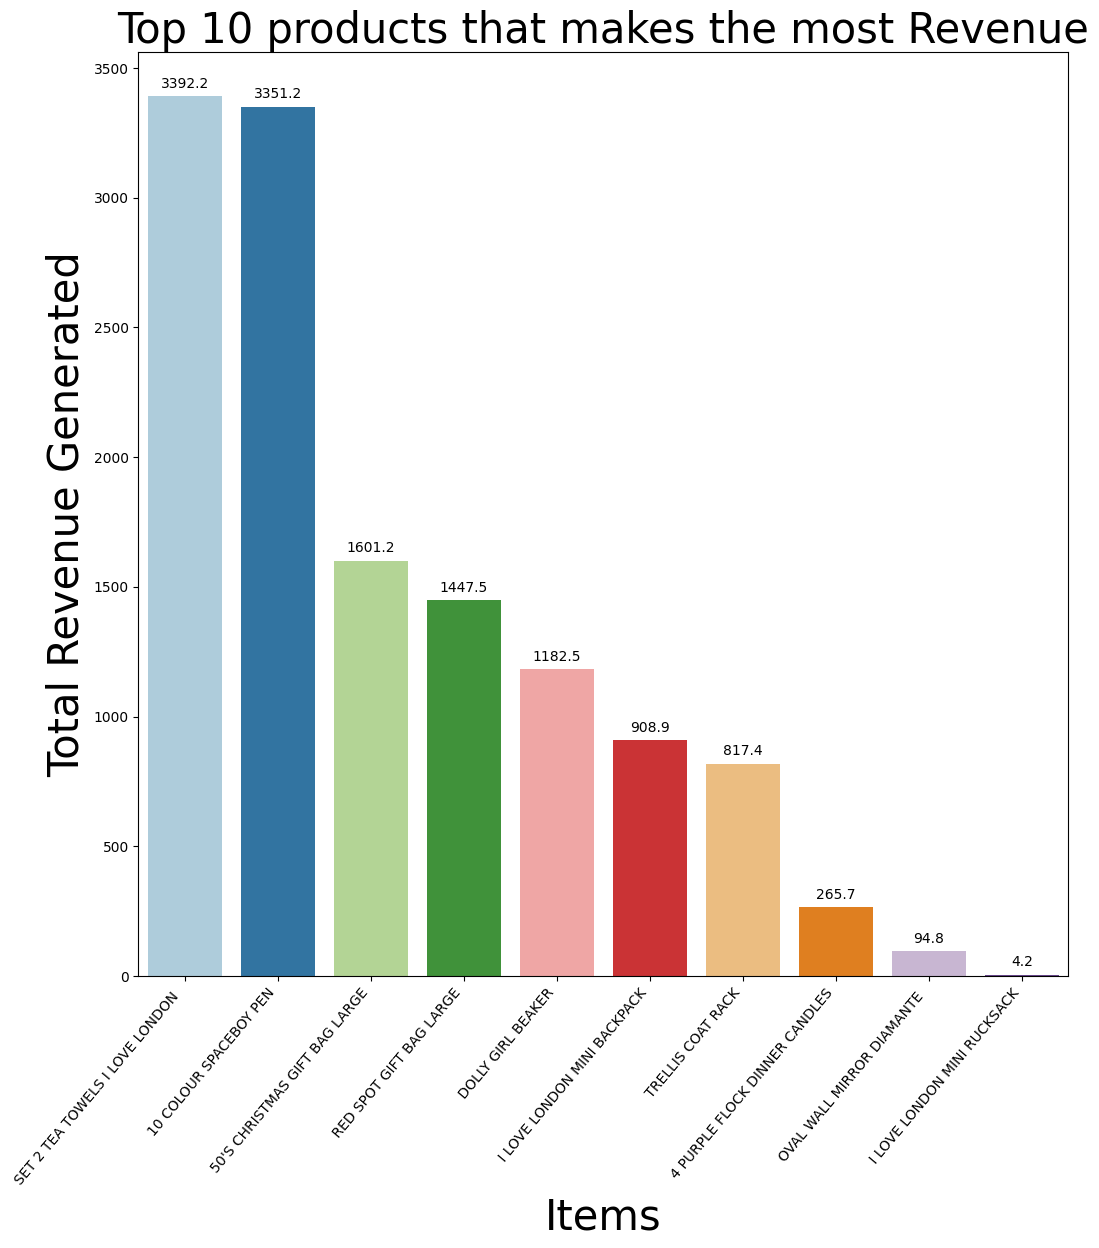

In [177]:
product_total_amount_df=customer_segmentation_df.groupby('Description')['total_amount'].sum().reset_index()[0:10].sort_values('total_amount',ascending=False)
data_visulalization(product_total_amount_df,x='Description',y='total_amount',x_label='Items',y_label='Total Revenue Generated',title='Top 10 products that makes the most Revenue')

### We can see that '***SET 2 TEA TOWELS I LOVE LONDON***' makes the most profit followed by '*10 COLOUR SPACEBOY PEN*'

## **Customers who have placed the most orders**

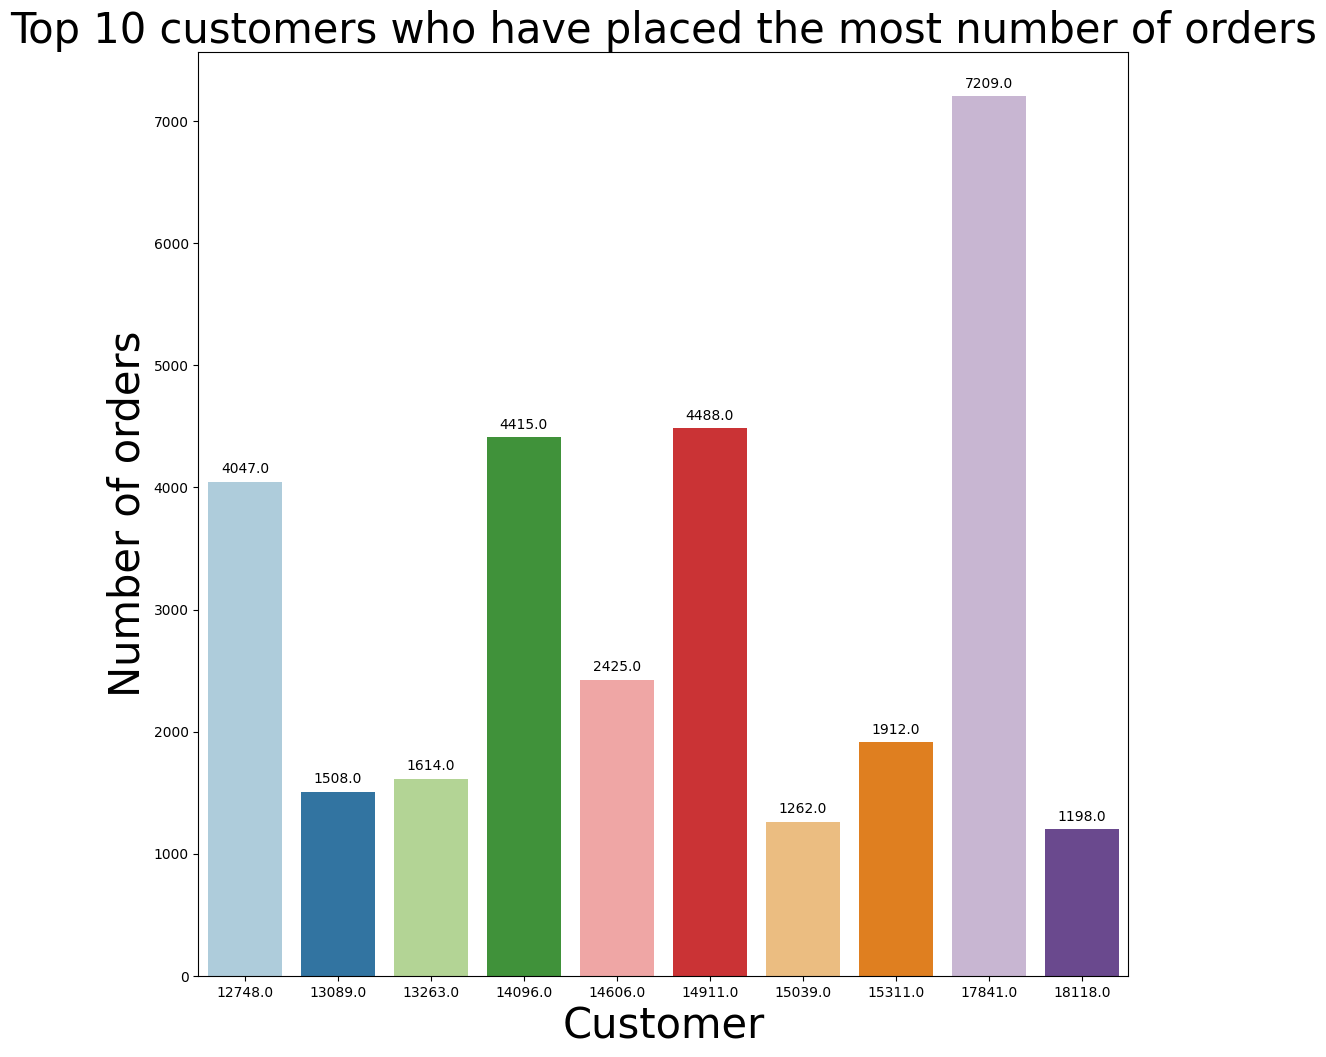

In [178]:
top_order_customer=customer_segmentation_df['CustomerID'].value_counts().reset_index().sort_values('CustomerID',ascending=False)[0:10]
data_visulalization(top_order_customer,x='index',y='CustomerID',x_label='Customer',y_label='Number of orders',title='Top 10 customers who have placed the most number of orders',rotation=False)

### We can see that Customers with 17841 has made the most numbers of orders of 7209 no. of orders.

## **Countries from which most orders have been made**

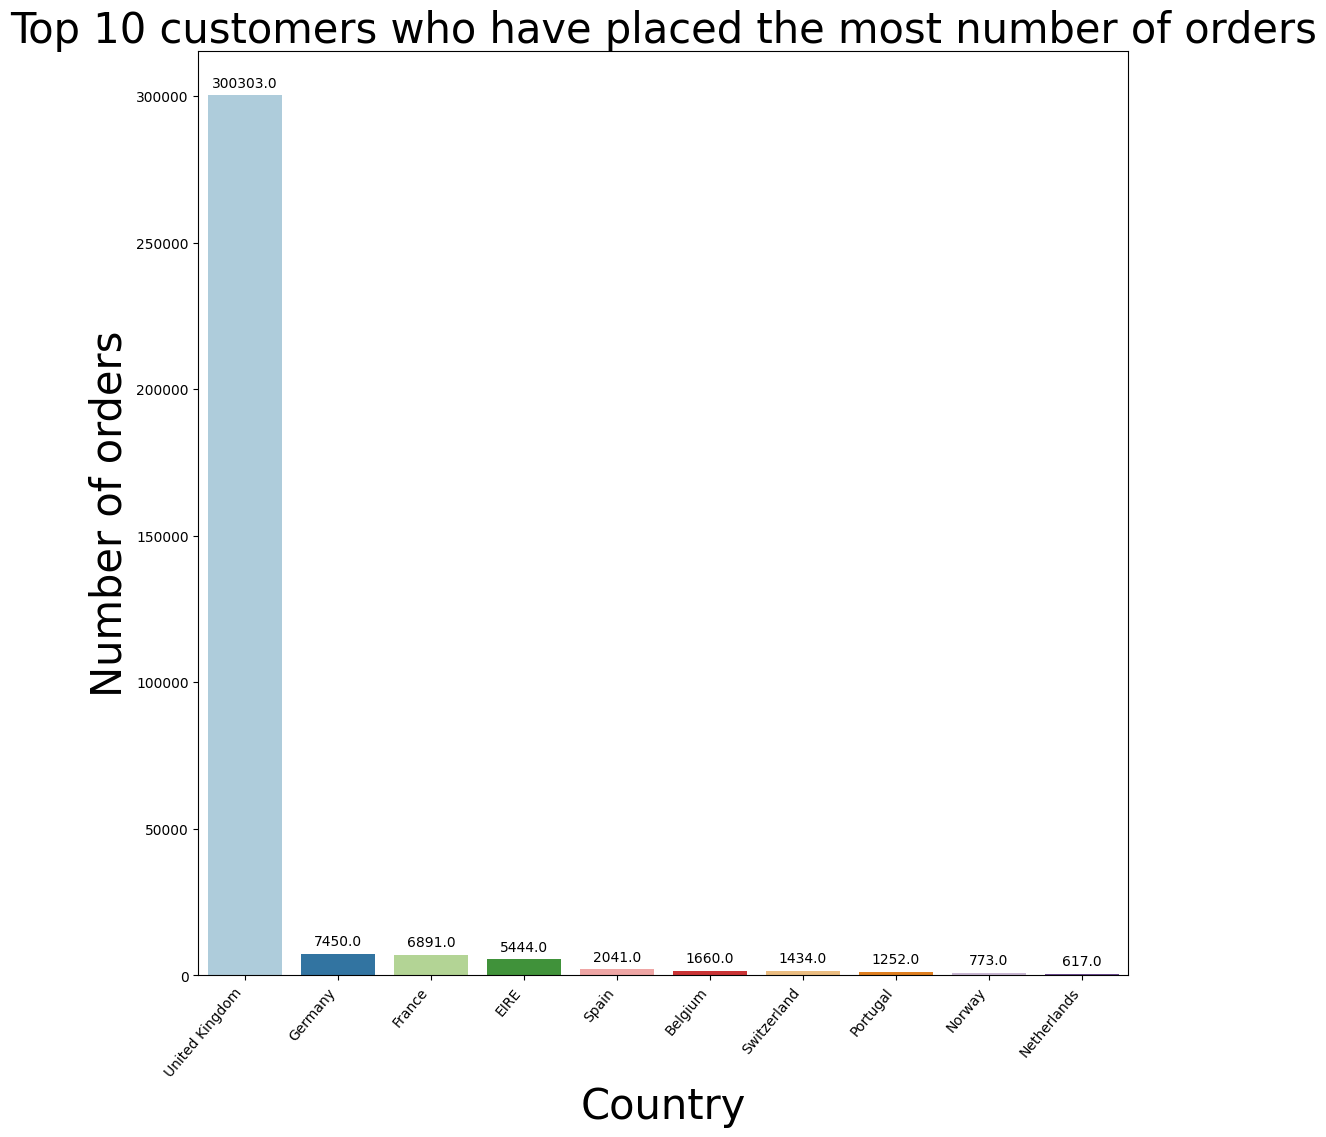

In [179]:
top_countries=customer_segmentation_df['Country'].value_counts().reset_index().sort_values('Country',ascending=False)[0:10]
data_visulalization(top_countries,x='index',y='Country',x_label='Country',y_label='Number of orders',title='Top 10 customers who have placed the most number of orders')

### We can see that United Kingdom has placed the most number of orders of around 3 lakh orders, second being Germany but with way less orders.

## **Hours for which most orders are made**

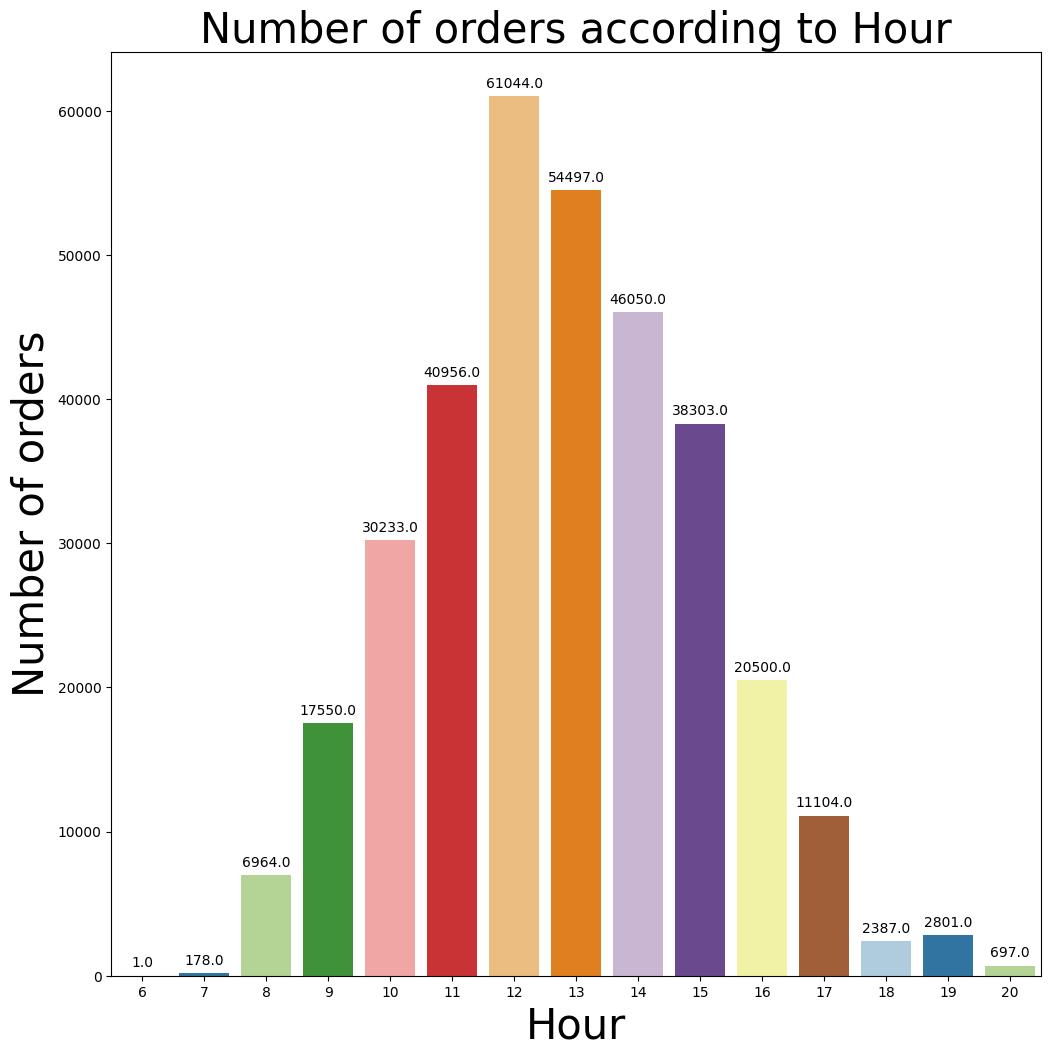

In [180]:
hour_df=customer_segmentation_df['Hour'].value_counts().reset_index().sort_values('Hour',ascending=False)[0:24]
data_visulalization(hour_df,x='index',y='Hour',x_label='Hour',y_label='Number of orders',title='Number of orders according to Hour',rotation=False)

### Most orders are made in the 12th hour, i.e 12pm to 1pm, and the least orders are made in the 6th hour, i.e 6am to 7am. We can see that no orders are made between 8pm and 6am.

## **Day of the month on which most number of orders are placed**

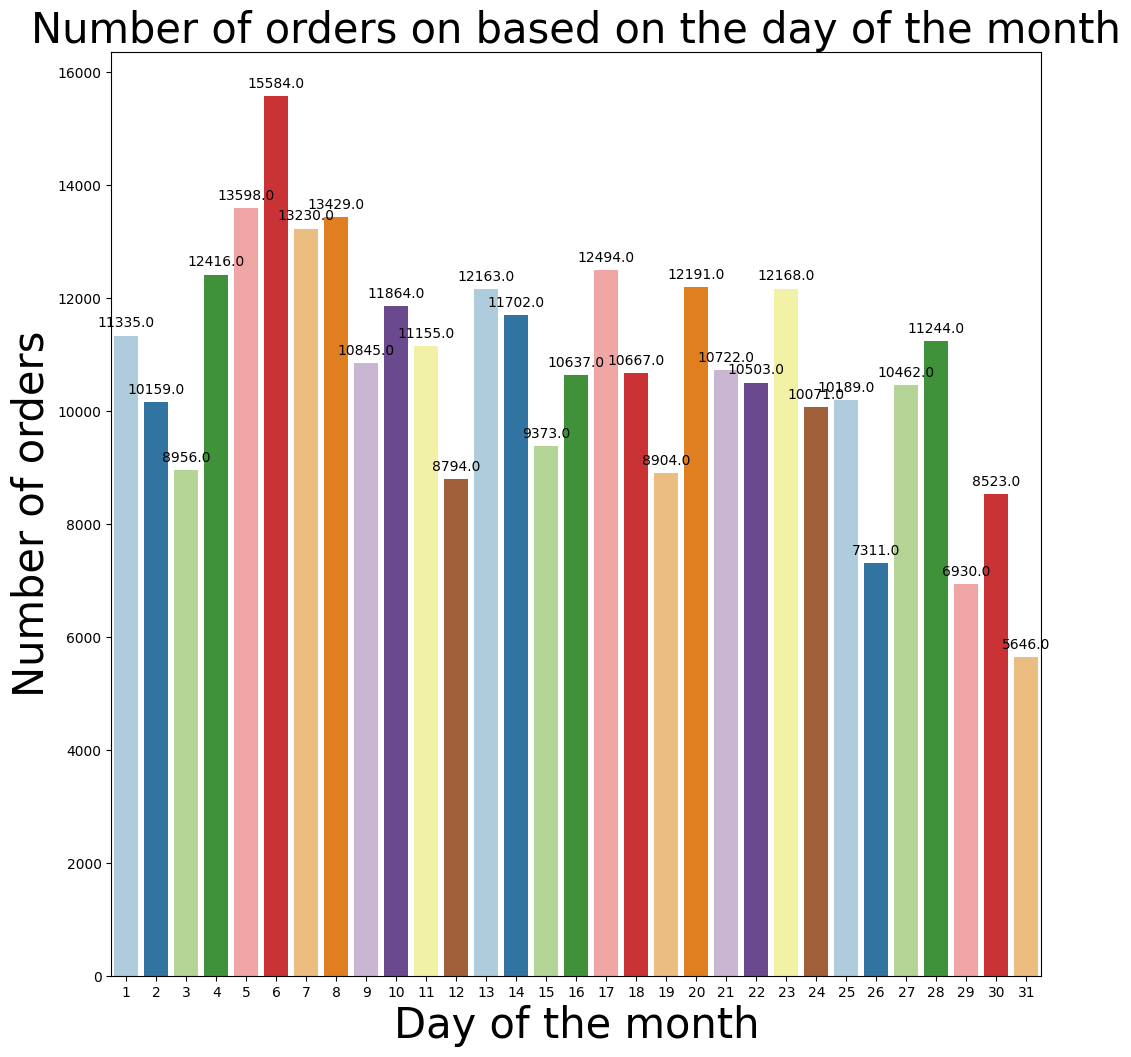

In [181]:
month_day_df=customer_segmentation_df['DayOfM'].value_counts().reset_index().sort_values('DayOfM',ascending=False)[0:31]
data_visulalization(month_day_df,x='index',y='DayOfM',x_label='Day of the month',y_label='Number of orders',title='Number of orders on based on the day of the month',rotation=False)

### The 6th day of the month has the highest number of orders and the 31st day has the lowest.

## **Day of the week on which most orders are made**

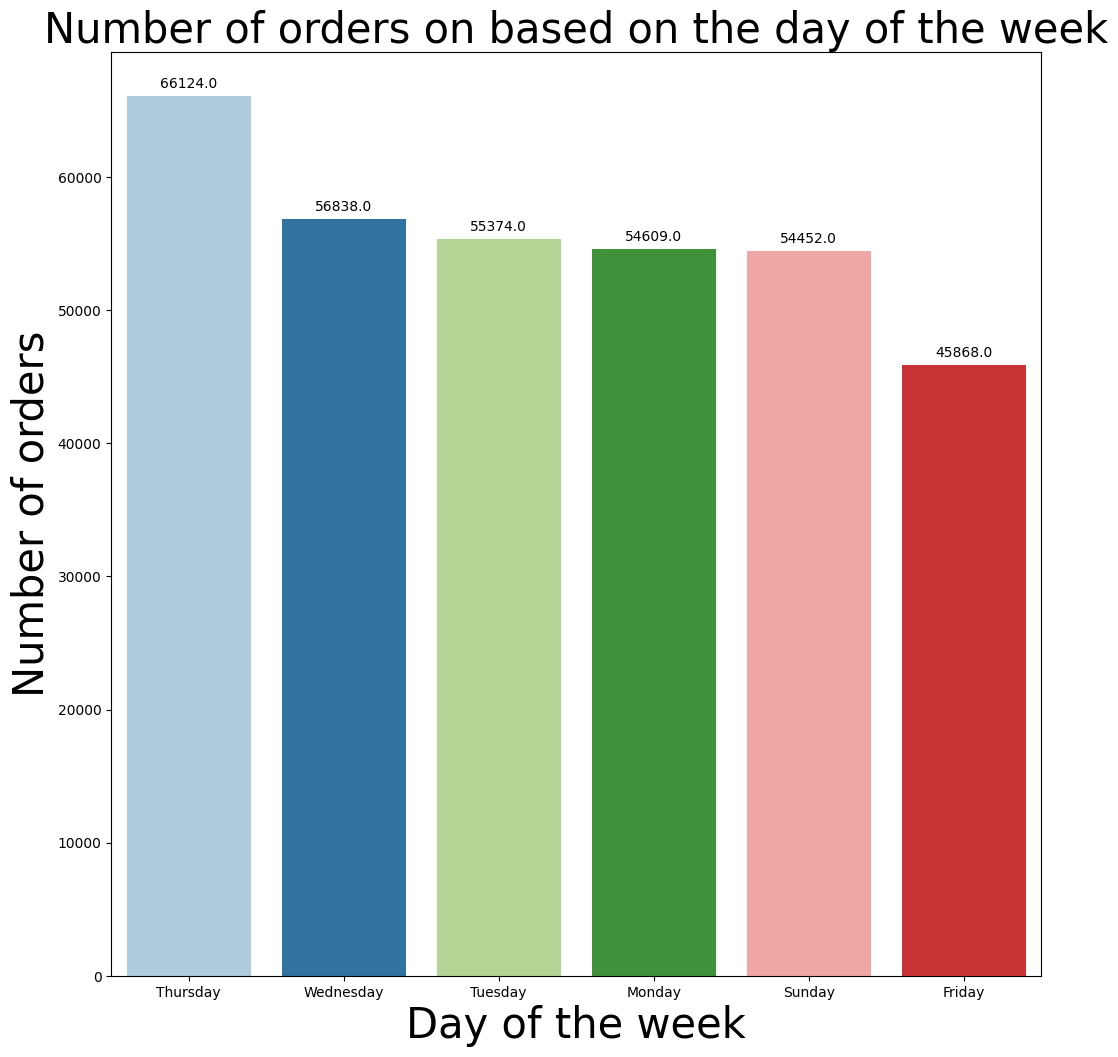

In [182]:
week_day_df=customer_segmentation_df['DayOfW'].value_counts().reset_index().sort_values('DayOfW',ascending=False)
data_visulalization(week_day_df,x='index',y='DayOfW',x_label='Day of the week',y_label='Number of orders',title='Number of orders on based on the day of the week',rotation=False)

### Most of the orders are made on Thurday,around 66 thousand, and the least number of orders are made on Friday, around 46 thousand.

## **Most orders made according to the month**

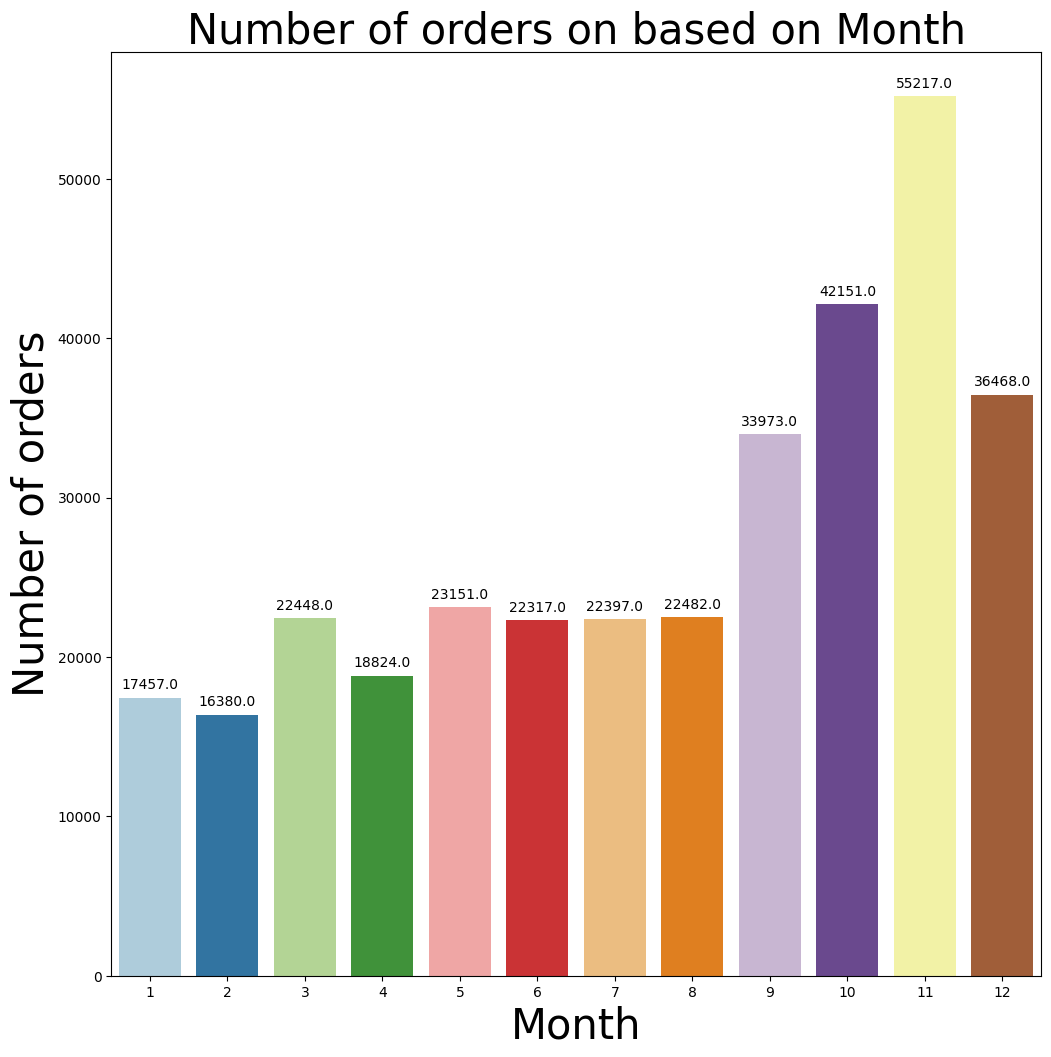

In [183]:
month_df=customer_segmentation_df['Month'].value_counts().reset_index().sort_values('Month',ascending=False)
data_visulalization(month_df,x='index',y='Month',x_label='Month',y_label='Number of orders',title='Number of orders on based on Month',rotation=False)

### The most number of orders are made in the 11th month, i.e December, and the least in the 2nd month, i.e February.

## **Distribution of the data**

In [184]:
#Creating a list of all the numerical columns in the data
numerical_columns=list(customer_segmentation_df.describe().columns)
numerical_columns

['Quantity',
 'UnitPrice',
 'CustomerID',
 'Hour',
 'DayOfM',
 'Month',
 'Year',
 'total_amount']

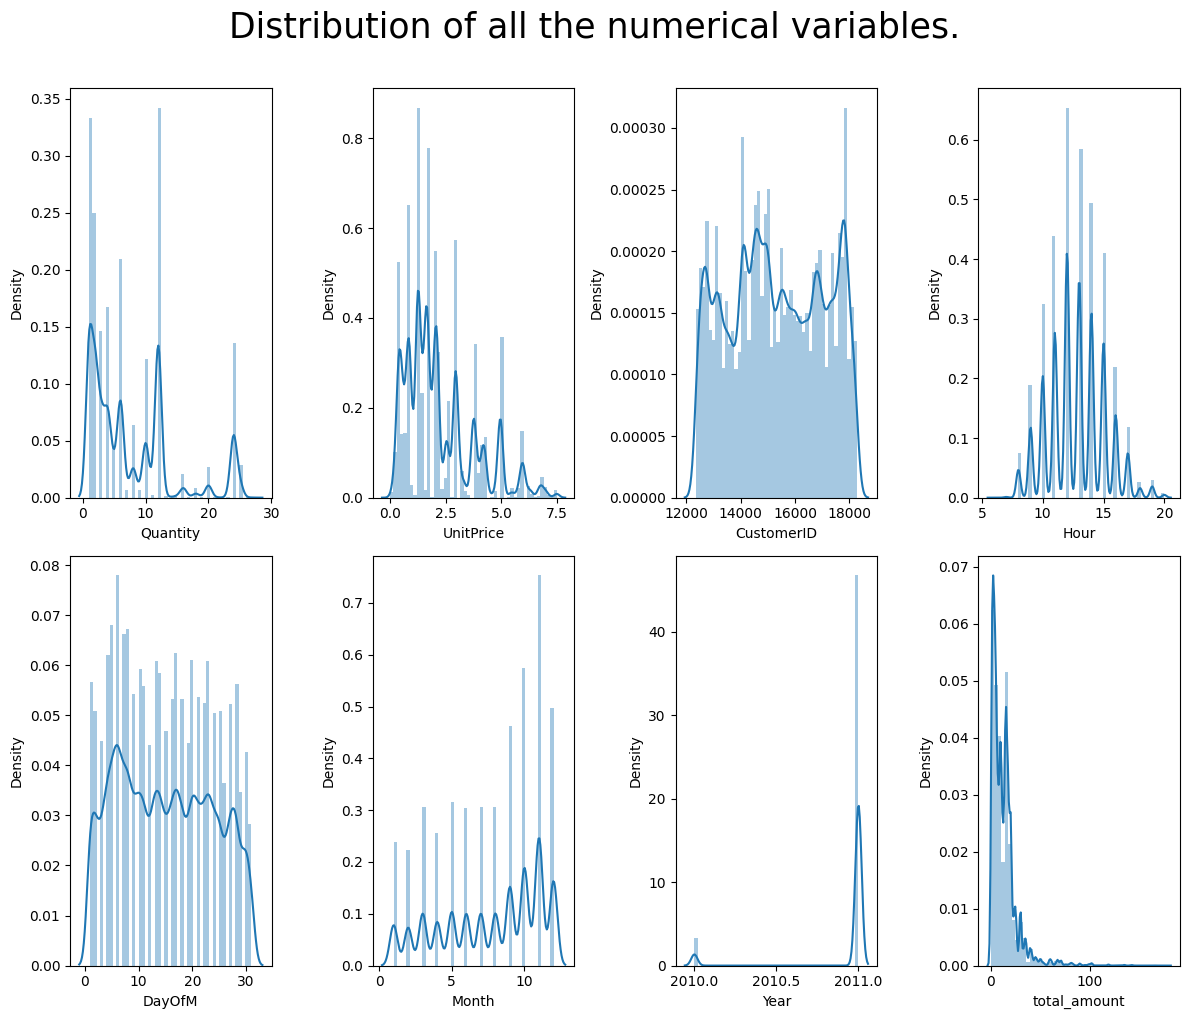

In [185]:
#Plotting the distribution of the data
plt.figure(figsize=(12,10))
plt.suptitle('Distribution of all the numerical variables.',va='bottom',size=25)
for index, item in enumerate(numerical_columns):
  plt.subplot(2,4,index+1)
  sns.distplot(customer_segmentation_df[item])
plt.tight_layout()

## **Plotting the correlation matrix**

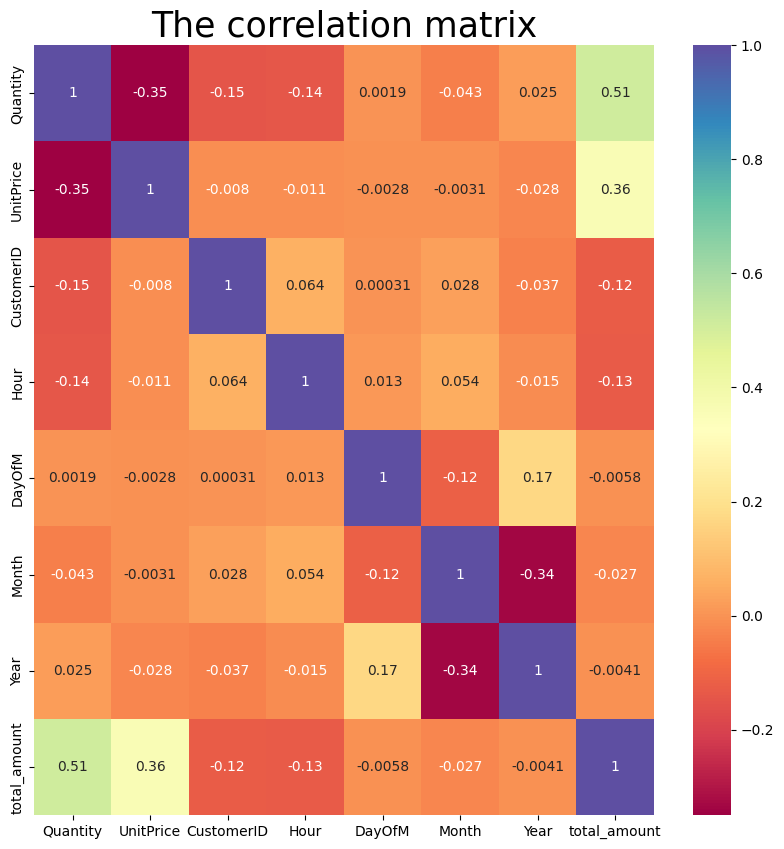

In [186]:
#Forming and plotting the correlation matrix
corr_matrix = customer_segmentation_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap='Spectral')
plt.title('The correlation matrix',size=25)
plt.show()

###As we can see, there is no distinct correlation between the variables except for the columns 'total_amount', 'Quantity' and 'UnitPrice', which is pretty understandable because of their relation with each other.

## **Forming the segmentation criteria**

### As stated earlier, I'll be performing Behavioral segmentation. To do this behavioral segmentation I'll be using the classical RFM (Recency, Frequency, Monetory) model.

### Refer to the picture below to know about RFM metrics.

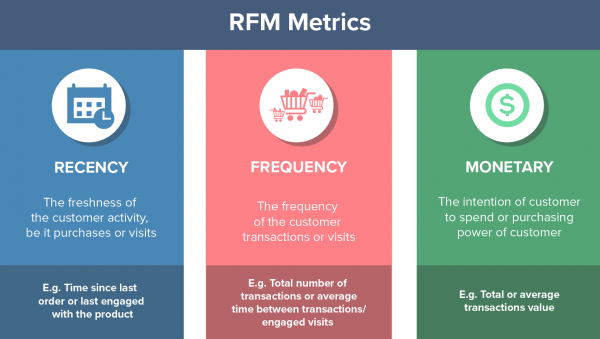

In [187]:
#creating a variable for the latest date in the invoice date, to further calculate the days for each order.
latest_date=customer_segmentation_df['InvoiceDate'].max()
latest_date

datetime.date(2011, 12, 9)

In [188]:
#Creating a dataframe to contain the days of since the last order for each customer to find the freshness or recency of the order.
recency_df=customer_segmentation_df.groupby('CustomerID')['InvoiceDate'].max().reset_index().rename(columns={'InvoiceDate':'Recency'})
recency_df['Recency']=recency_df['Recency'].apply(lambda x :(latest_date-x).days)
recency_df

,CustomerID,Recency
0,12347.0,2
1,12348.0,248
2,12349.0,18
3,12350.0,310
4,12352.0,36
...,...,...
4187,18280.0,277
4188,18281.0,180
4189,18282.0,7
4190,18283.0,3


In [189]:
#Creating dataframe for frequency to contain the number of times a customer has ordered
frequency_df=customer_segmentation_df.groupby('CustomerID')['Description'].count().reset_index().rename(columns={'Description':'Count'})
frequency_df

,CustomerID,Count
0,12347.0,166
1,12348.0,6
2,12349.0,58
3,12350.0,16
4,12352.0,66
...,...,...
4187,18280.0,8
4188,18281.0,5
4189,18282.0,8
4190,18283.0,717


In [190]:
#Creating dataframe for frequency to contain the total spends of a customer
monetary_df=customer_segmentation_df.groupby('CustomerID')['total_amount'].sum().reset_index()
monetary_df

,CustomerID,total_amount
0,12347.0,3314.73
1,12348.0,90.20
2,12349.0,999.15
3,12350.0,294.40
4,12352.0,1130.94
...,...,...
4187,18280.0,137.00
4188,18281.0,46.92
4189,18282.0,113.13
4190,18283.0,2002.63


In [191]:
#Creating a RMF dataframe for further analysis
rmf_df=pd.DataFrame()
rmf_df['CustomerID']=recency_df['CustomerID']
rmf_df['Recency']=recency_df['Recency']
rmf_df['Frequency']=frequency_df['Count']
rmf_df['Monetary']=monetary_df['total_amount']
rmf_df=rmf_df.set_index('CustomerID')
rmf_df


,Recency,Frequency,Monetary
CustomerID,,,
12347.0,2,166,3314.73
12348.0,248,6,90.20
12349.0,18,58,999.15
12350.0,310,16,294.40
12352.0,36,66,1130.94
...,...,...,...
18280.0,277,8,137.00
18281.0,180,5,46.92
18282.0,7,8,113.13


In [192]:
list(rmf_df.columns)

['Recency', 'Frequency', 'Monetary']

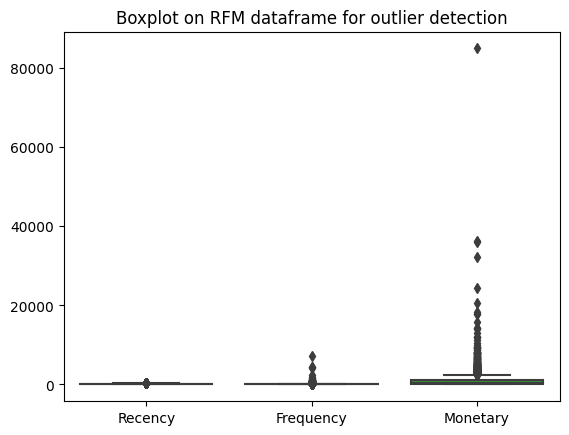

In [193]:
#Checking for outliers in rmf dataset
rmf_cols = (list(rmf_df.columns))
#Checking for outliers in the rfm dataframe
sns.boxplot(data=rmf_df[rmf_cols])
plt.title('Boxplot on RFM dataframe for outlier detection')
plt.show()

In [194]:
#shape of the dataset before removing the outliers
rmf_df.shape

(4192, 3)

In [195]:
#Removing the outliers
rmf_df = handling_outliers(data=rmf_df,feature='Recency')
rmf_df = handling_outliers(data=rmf_df,feature='Frequency')
rmf_df = handling_outliers(data=rmf_df,feature='Monetary')

In [196]:
#shape after removing the outliers
rmf_df.shape

(3426, 3)

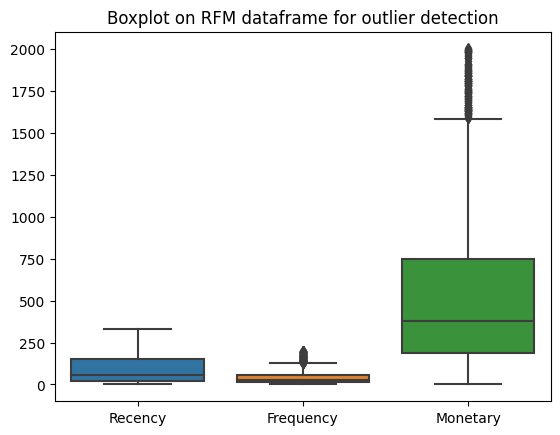

In [197]:
#Checking for outliers in rmf dataset after handling the outliers
rmf_cols = (list(rmf_df.columns))
#Checking for outliers in the rfm dataframe
sns.boxplot(data=rmf_df[rmf_cols])
plt.title('Boxplot on RFM dataframe for outlier detection')
plt.show()

In [198]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i)
  km.fit_predict(rmf_df)
  wcss.append(km.inertia_)

### We have handeled the outliers successfully

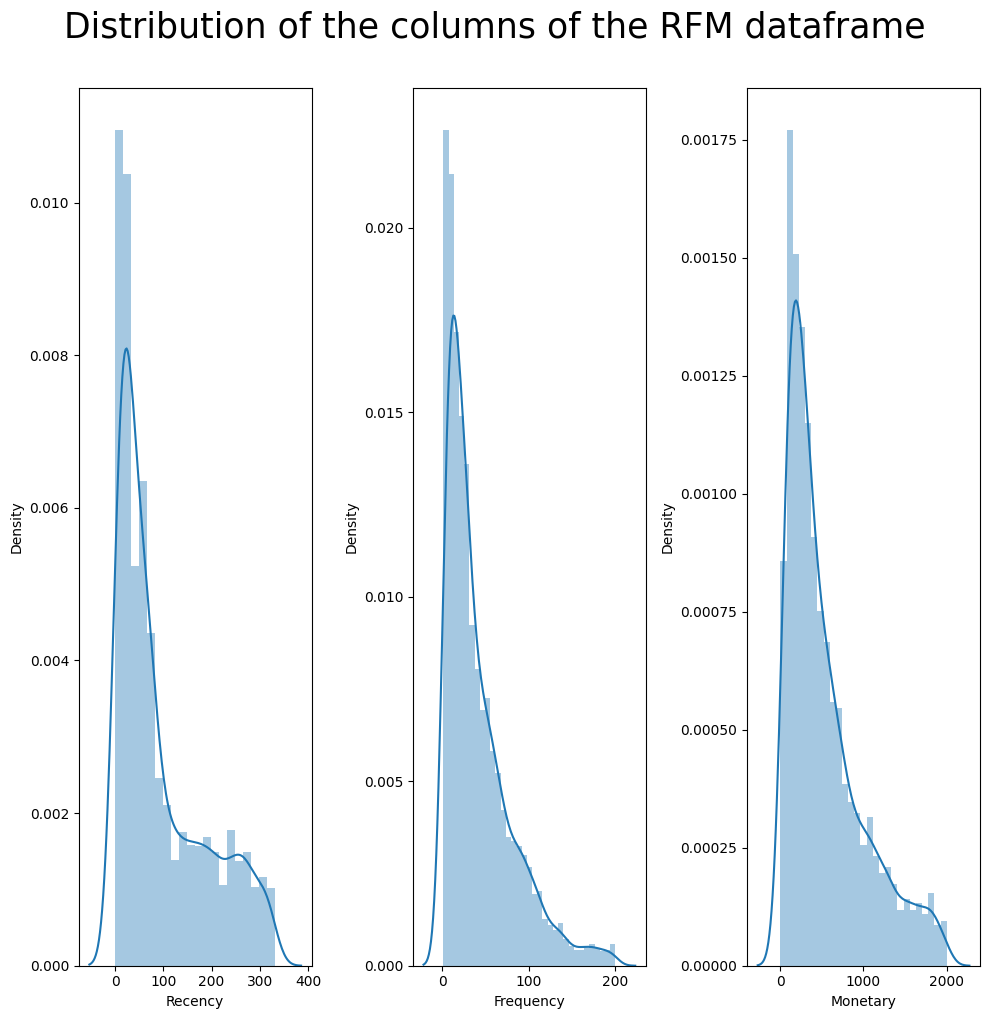

In [199]:
#Plotting the distribution of the columns of the RFM dataframe
plt.figure(figsize=(10,10))
plt.suptitle('Distribution of the columns of the RFM dataframe',va='bottom',size=25)
for index, item in enumerate(rmf_cols):
  plt.subplot(1,3,index+1)
  sns.distplot(rmf_df[item])
plt.tight_layout()

### **Points to be noted from the distribution plots:**

###Most of the customers have a Recency between 0-100 days.
###Most of the customers have a Frequency between 0-120 times.
###Most of the customers have a Monetary between 0- 1000 pounds.

## **Pre-Processing the data**

### Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

In [200]:
#Scaling and normalizing the data
scaler=StandardScaler()
normalizer=Normalizer()
rmf_scaled=scaler.fit_transform(rmf_df)
rmf_scaled=normalizer.fit_transform(rmf_df)

In [201]:
#Scaled data
rmf_scaled

array([[0.93952848, 0.02273053, 0.3417156 ],
       [0.01798213, 0.05794241, 0.99815796],
       [0.72460894, 0.03739917, 0.68814475],
       ...,
       [0.96731582, 0.02686988, 0.25214699],
       [0.06160436, 0.07040498, 0.9956144 ],
       [0.04361477, 0.05192235, 0.99769826]])

## **Model Implementation**

###In this project we are dealing with an unlabelled dataset and a clustering problem, therefore we'll be using some unsupervised algorithms.

###In this project we will be including the following models:

###1.K Means
###2.K means with elbow method
###3.Hierarchical clustering (Agglomerative)

## **K Means with elbow curve**

### **Elbow Curve:** In cluster analysis, the elbow curve is a heuristic used in determining the number of clusters in a data set. The curve consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

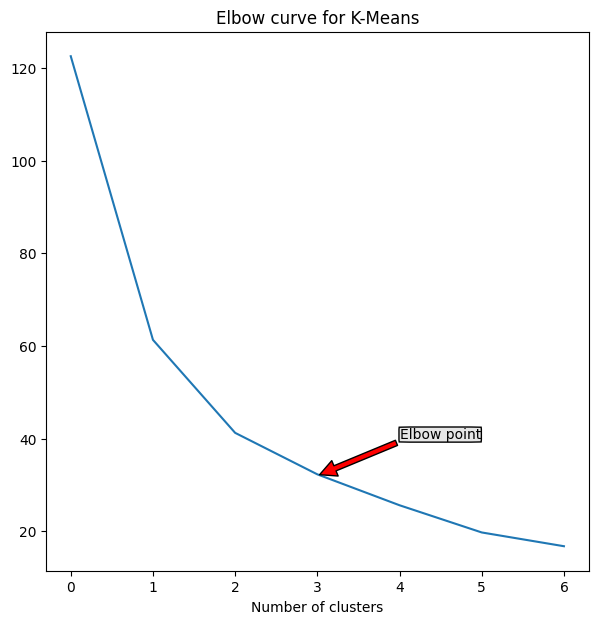

In [202]:
#Getting the elbow curve for different number of clusters
wcss = []
#Creating a list of number of clusters
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
#Implementing the model for different number of clusters
for num_clusters in range_n_clusters:
  kmeans_model_iter = KMeans(n_clusters=num_clusters,random_state=0)
  kmeans_model_iter.fit_predict(rmf_scaled)
  wcss.append(kmeans_model_iter.inertia_)
# plot the elbow curve 
plt.figure(figsize=(7,7))
plt.plot(wcss)
plt.title('Elbow curve for K-Means')
plt.annotate('Elbow point', xy=(3, 32), xytext=(4,40),\
             bbox=dict(boxstyle="round4,pad=.05", fc="0.9"),\
             arrowprops=dict(facecolor='red', shrink=0.027))
plt.xlabel('Number of clusters')
plt.show()

### We can see that the last point for any abrupt change was for 3rd cluster and hence we will choose the number of cluster value to 3.

In [231]:
#A function that calculates the silhouette_score for the unsupervised machine learning algorithm.
def find_silhouette_score(data:pd.DataFrame,labels: np.array):
  #A higher silhouette score is better  
  sh_score = silhouette_score(data,labels)
  print('The silhouette score is:',sh_score)

In [203]:
#Implementing KMeans with 3 clusters
kmeans_model = KMeans(n_clusters=3,random_state=0)
cluster_predict = kmeans_model.fit_predict(rmf_scaled)
cluster_predict

array([2, 1, 0, ..., 2, 1, 1], dtype=int32)

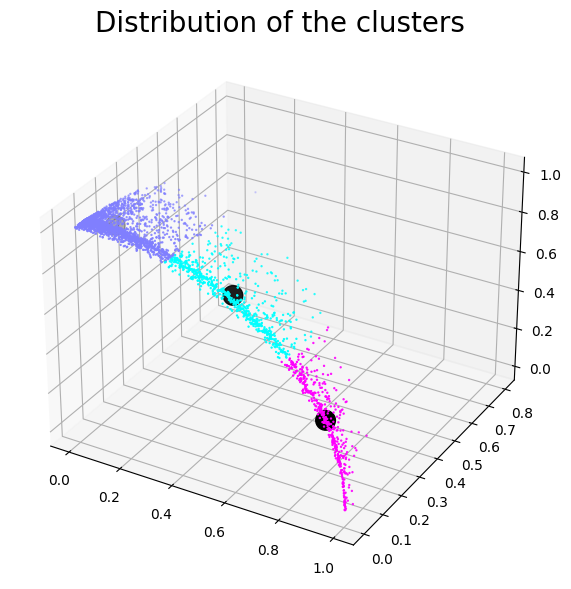

In [258]:
#Visualising the kmeans clustering
plt.figure(figsize=(7,7))
ax = plt.axes(projection ="3d")
ax.scatter3D(xs=rmf_scaled[:,0], ys=rmf_scaled[:,1], zs=(rmf_scaled[:,2]), c = cluster_predict,s=0.5,cmap='cool')
#plt.scatter(x=rmf_scaled[:,0],y=rmf_scaled[:,1],c=cluster_predict,s=5,cmap='spectral')
#Plotting the cluster centres 
centers = kmeans_model.cluster_centers_
ax.scatter3D(xs=centers[:, 0], ys=centers[:, 1],zs=centers[:, 2], color = 'black',s=200)
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7)
plt.title("Distribution of the clusters",size=20)
plt.show()

In [260]:
#Finding the silhouette score to see how well our k-means model is performing
find_silhouette_score(rmf_scaled,cluster_predict)

The silhouette score is: 0.6483894590482557


### The silhhouette score is scoring parameter for clustering algorithms which is between -1 to 1, the higher the value the better the clustering.We are getting 0.648 as sihouette score for k-means algorithm, let's see if we can improve this score in other models.

## **Hierarchical Clustering**

### Hierarchical clustering is another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA.

###In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.

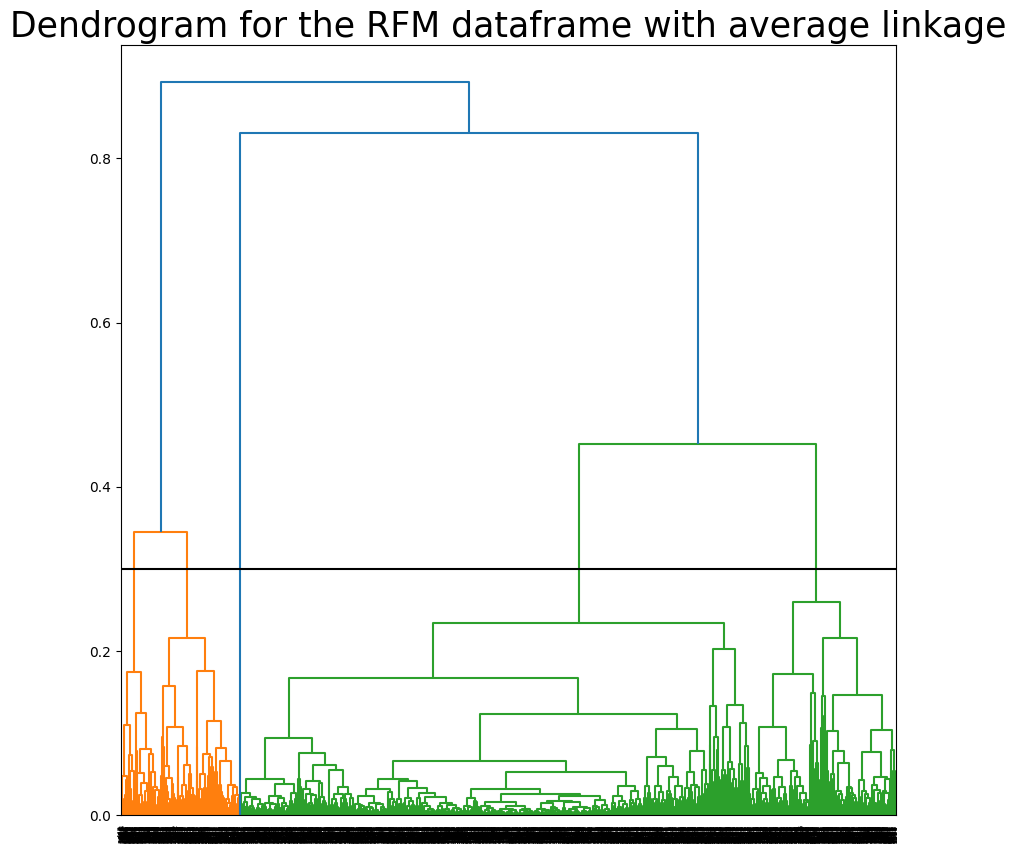

In [264]:
#Getting the number of clusters using dendogram
plt.figure(figsize=(10,10))
merging = linkage(rmf_scaled,method='average',metric='euclidean')
dendrogram(merging)
plt.title('Dendrogram for the RFM dataframe with average linkage',size=25)
#Cutting the dendrogram at the longest vertical line without being cut by a horizontal line 
plt.axhline(y=0.3,c='k')
plt.show()

### **We get the optimum number of clusters as 3 from the dendrogram.**
### Hierarchical clustering has 2 types:
### 1.Agglomerative clustering.
### 2.Divisive Clustering.
### In this project I'll be applying the Agglomerative approach.


In [267]:
#Applying the Agglomerative clustering model on the RFM dataset
agglo_model = AgglomerativeClustering(n_clusters=3,linkage='average',affinity='euclidean')
cluster_predict_agglo = agglo_model.fit_predict(rmf_scaled)
np.unique(cluster_predict_agglo)

array([0, 1, 2])

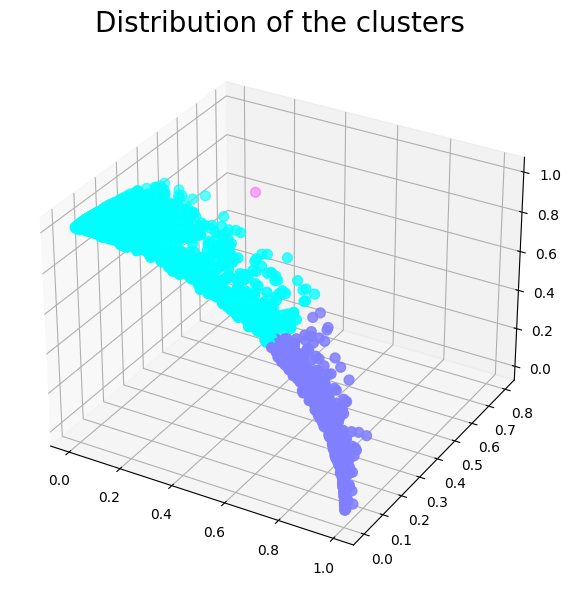

In [275]:
#Visualising the kmeans clustering
plt.figure(figsize=(7,7))
ax = plt.axes(projection ="3d")
ax.scatter3D(xs=rmf_scaled[:,0], ys=rmf_scaled[:,1], zs=(rmf_scaled[:,2]), c = cluster_predict_agglo,s=50,cmap='cool')
plt.title("Distribution of the clusters",size=20)
plt.show()

In [289]:
#Finding the silhouette score to see how well our k-means model is performing
find_silhouette_score(rmf_scaled,cluster_predict_agglo)

The silhouette score is: 0.6548784216898454


### We can see that the silhouette score has improved a bit, we will implement dbScan clustering to see if we can further improve the score.

## **DB Scan**

### DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

In [335]:
dbscan_model=DBSCAN(eps=0.05, min_samples=5, metric='euclidean')
cluster_predict_dbscan=dbscan_model.fit_predict(rmf_scaled)
grid

array([0, 0, 0, ..., 0, 0, 0])

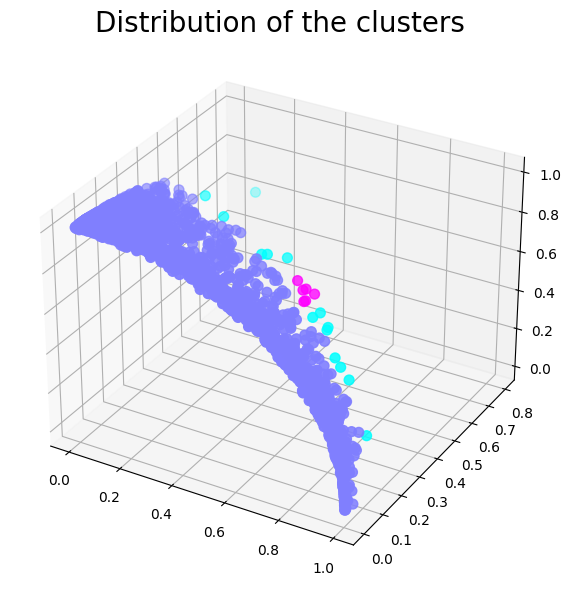

In [336]:
#Visualising the kmeans clustering
plt.figure(figsize=(7,7))
ax = plt.axes(projection ="3d")
ax.scatter3D(xs=rmf_scaled[:,0], ys=rmf_scaled[:,1], zs=(rmf_scaled[:,2]), c = cluster_predict_dbscan,s=50,cmap='cool')
plt.title("Distribution of the clusters",size=20)
plt.show()

In [337]:
#Finding the silhouette score to see how well our k-means model is performing
find_silhouette_score(rmf_scaled,cluster_predict_dbscan)

The silhouette score is: 0.23606461923541436
